In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.8 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.4824 - val_loss: 0.0052
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1369 - val_loss: 0.0018
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0972 - val_loss: 0.0011
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0547 - val_loss: 8.1519e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0381 - val_loss: 4.5198e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0342 - val_loss: 0.0012
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0240 - val_loss: 4.9822e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0235 - val_loss: 9.1239e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0184 - val_loss: 6.5990e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0189 - val_loss: 6.2414e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0147 - val_loss: 5.5723e-04
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 220ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 776.4372000392701
MAPE: 2.900914650295582 %
MSLE: 0.0017962638820607313


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.13923421 0.1717477  0.16983514 0.15835979 0.15070956 0.15070956
 0.148797   0.15453467 0.148797   0.14497189 0.148797   0.148797
 0.14497189 0.15070956 0.15070956 0.14688444 0.14497189 0.14497189
 0.15070956 0.14688444 0.15070956 0.148797   0.14688444 0.14114677
 0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 

7 day output [[0.6540637]]
8 day input [0.148797   0.14497189 0.148797   0.148797   0.14497189 0.15070956
 0.15070956 0.14688444 0.14497189 0.14497189 0.15070956 0.14688444
 0.15070956 0.148797   0.14688444 0.14114677 0.14114677 0.15262212
 0.148797   0.15070956 0.16218491 0.16218491 0.15835979 0.15644723
 0.15453467 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467
 0.15835979 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304
 0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 

15 day output [[0.6030146]]
16 day input [0.14497189 0.14497189 0.15070956 0.14688444 0.15070956 0.148797
 0.14688444 0.14114677 0.14114677 0.15262212 0.148797   0.15070956
 0.16218491 0.16218491 0.15835979 0.15644723 0.15453467 0.15070956
 0.16027235 0.15644723 0.15453467 0.15453467 0.15835979 0.19087327
 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327
 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356
 0.18322304 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356
 0.18704816 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605
 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71498227 0.71236968 0.70

23 day output [[0.57424325]]
24 day input [0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.71498227 0.71236968
 0.70393771 0.69115931 0.69065779 0.67572892 0.66667706 0.6540637
 0.64359999 0.63516957 0.

31 day output [[0.53087384]]
32 day input [0.15453467 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467
 0.15835979 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304
 0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71498227 0.71236968 0.70393771 0.69115931
 0.69065779 0.67572892 0.66667706 0.6540637  0.64359999 0.63516957
 0.62709743 0.61942846 0.61200541 0.61038476 0.60705072 0.60301459
 0.6004495  0.600836

39 day output [[0.4964097]]
40 day input [0.19087327 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327
 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356
 0.18322304 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356
 0.18704816 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605
 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71498227 0.71236968 0.70393771 0.69115931 0.69065779 0.67572892
 0.66667706 0.6540637  0.64359999 0.63516957 0.62709743 0.61942846
 0.61200541 0.61038476 0.60705072 0.60301459 0.6004495  0.60083681
 0.59051645 0.58617175 0.5824582  0.57593656 0.57685745 0.57424325
 0.5706681  0.56602854 0.

47 day output [[0.47322613]]
48 day input [0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.71498227 0.71236968
 0.70393771 0.69115931 0.69065779 0.67572892 0.66667706 0.6540637
 0.64359999 0.63516957 0.62709743 0.61942846 0.61200541 0.61038476
 0.60705072 0.60301459 0.6004495  0.60083681 0.59051645 0.58617175
 0.5824582  0.57593656 0.57685745 0.57424325 0.5706681  0.56602854
 0.56182837 0.55299556 0.54540342 0.54076099 0.53645223 0.53087384
 0.52487141 0.52217478 0.

55 day output [[0.4590196]]
56 day input [0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71498227 0.71236968 0.70393771 0.69115931
 0.69065779 0.67572892 0.66667706 0.6540637  0.64359999 0.63516957
 0.62709743 0.61942846 0.61200541 0.61038476 0.60705072 0.60301459
 0.6004495  0.60083681 0.59051645 0.58617175 0.5824582  0.57593656
 0.57685745 0.57424325 0.5706681  0.56602854 0.56182837 0.55299556
 0.54540342 0.54076099 0.53645223 0.53087384 0.52487141 0.52217478
 0.51429975 0.5112927  0.50770253 0.50392747 0.50062114 0.49640971
 0.49479777 0.4890146

63 day output [[0.4353661]]
64 day input [0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71498227 0.71236968 0.70393771 0.69115931 0.69065779 0.67572892
 0.66667706 0.6540637  0.64359999 0.63516957 0.62709743 0.61942846
 0.61200541 0.61038476 0.60705072 0.60301459 0.6004495  0.60083681
 0.59051645 0.58617175 0.5824582  0.57593656 0.57685745 0.57424325
 0.5706681  0.56602854 0.56182837 0.55299556 0.54540342 0.54076099
 0.53645223 0.53087384 0.52487141 0.52217478 0.51429975 0.5112927
 0.50770253 0.50392747 0.50062114 0.49640971 0.49479777 0.48901463
 0.48734111 0.48263836 0.47715223 0.47542477 0.47433448 0.47322613
 0.47085971 0.46997488 0

71 day output [[0.4184165]]
72 day input [0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.71498227 0.71236968
 0.70393771 0.69115931 0.69065779 0.67572892 0.66667706 0.6540637
 0.64359999 0.63516957 0.62709743 0.61942846 0.61200541 0.61038476
 0.60705072 0.60301459 0.6004495  0.60083681 0.59051645 0.58617175
 0.5824582  0.57593656 0.57685745 0.57424325 0.5706681  0.56602854
 0.56182837 0.55299556 0.54540342 0.54076099 0.53645223 0.53087384
 0.52487141 0.52217478 0.51429975 0.5112927  0.50770253 0.50392747
 0.50062114 0.49640971 0.49479777 0.48901463 0.48734111 0.48263836
 0.47715223 0.47542477 0.47433448 0.47322613 0.47085971 0.46997488
 0.46742952 0.46740884 0.46542811 0.46330518 0.46026635 0.4590196
 0.45641643 0.45260924 0.4

79 day output [[0.406959]]
80 day input [0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528
 0.73021459 0.7340397  0.71498227 0.71236968 0.70393771 0.69115931
 0.69065779 0.67572892 0.66667706 0.6540637  0.64359999 0.63516957
 0.62709743 0.61942846 0.61200541 0.61038476 0.60705072 0.60301459
 0.6004495  0.60083681 0.59051645 0.58617175 0.5824582  0.57593656
 0.57685745 0.57424325 0.5706681  0.56602854 0.56182837 0.55299556
 0.54540342 0.54076099 0.53645223 0.53087384 0.52487141 0.52217478
 0.51429975 0.5112927  0.50770253 0.50392747 0.50062114 0.49640971
 0.49479777 0.48901463 0.48734111 0.48263836 0.47715223 0.47542477
 0.47433448 0.47322613 0.47085971 0.46997488 0.46742952 0.46740884
 0.46542811 0.46330518 0.46026635 0.4590196  0.45641643 0.45260924
 0.45175576 0.44813275 0.44509679 0.44022888 0.43863213 0.43536609
 0.4333145  0.43213695

87 day output [[0.40127486]]
88 day input [0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.71498227 0.71236968 0.70393771 0.69115931 0.69065779 0.67572892
 0.66667706 0.6540637  0.64359999 0.63516957 0.62709743 0.61942846
 0.61200541 0.61038476 0.60705072 0.60301459 0.6004495  0.60083681
 0.59051645 0.58617175 0.5824582  0.57593656 0.57685745 0.57424325
 0.5706681  0.56602854 0.56182837 0.55299556 0.54540342 0.54076099
 0.53645223 0.53087384 0.52487141 0.52217478 0.51429975 0.5112927
 0.50770253 0.50392747 0.50062114 0.49640971 0.49479777 0.48901463
 0.48734111 0.48263836 0.47715223 0.47542477 0.47433448 0.47322613
 0.47085971 0.46997488 0.46742952 0.46740884 0.46542811 0.46330518
 0.46026635 0.4590196  0.45641643 0.45260924 0.45175576 0.44813275
 0.44509679 0.44022888 0.43863213 0.43536609 0.4333145  0.43213695
 0.42836827 0.42549366 0.42490321 0.42224193 0.41965795 0.4184165
 0.41656357 0.41557688 

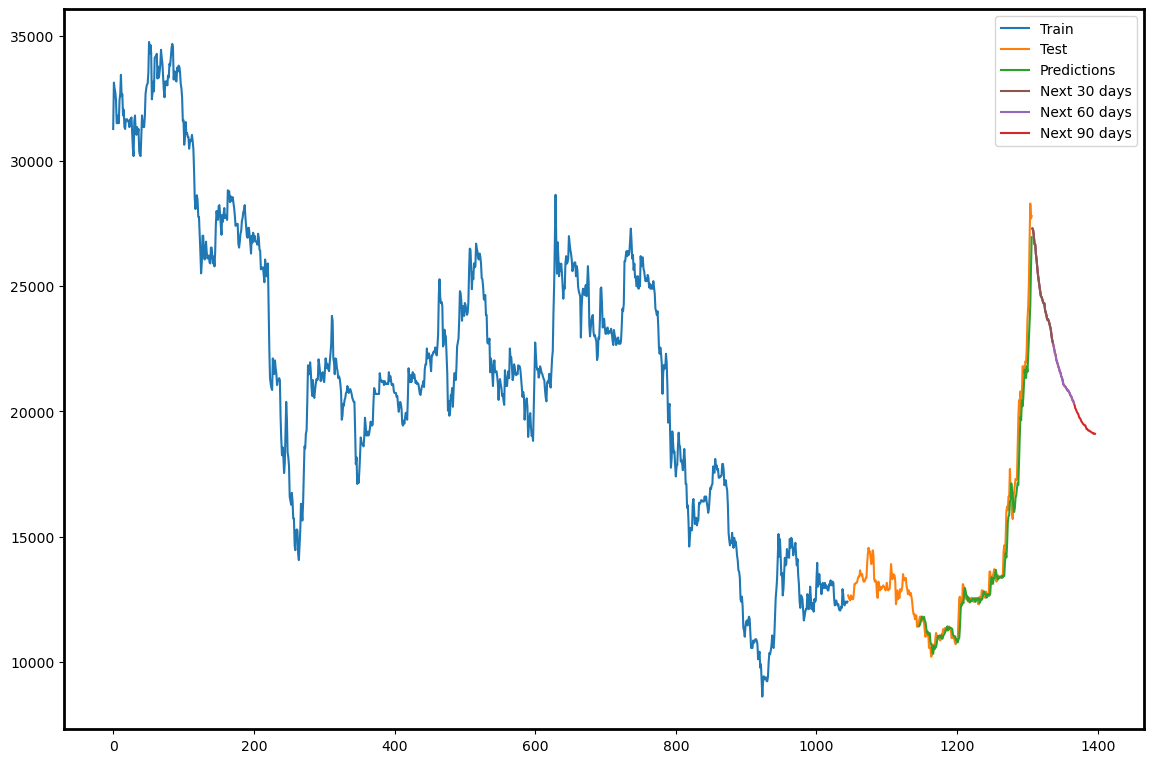

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_HVN_82.png")
plt.show()